Yogendra Verma(1814)

In [80]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#plt.rcParams["figure.figsize"] = (10,5)
data = pd.read_csv('/content/drive/My Drive/ANN/cardio_train.csv',sep=";")

In [81]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [82]:
print(data.shape)
data.info()

(69301, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [83]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [84]:
data.isnull().values.any()

False

In [85]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


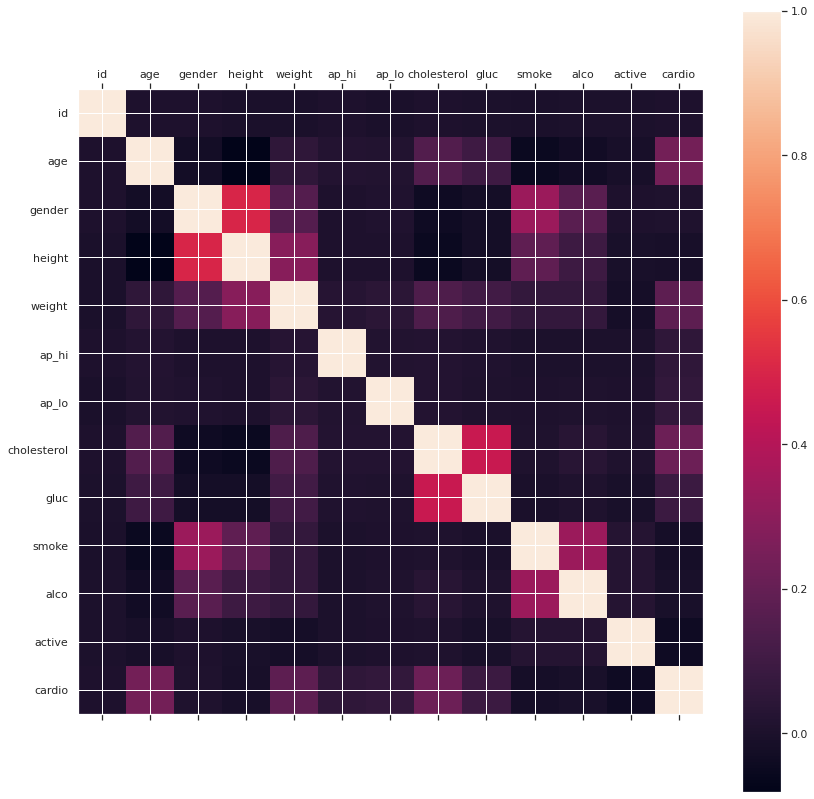

In [86]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc31c74080>,
      dtype=object)

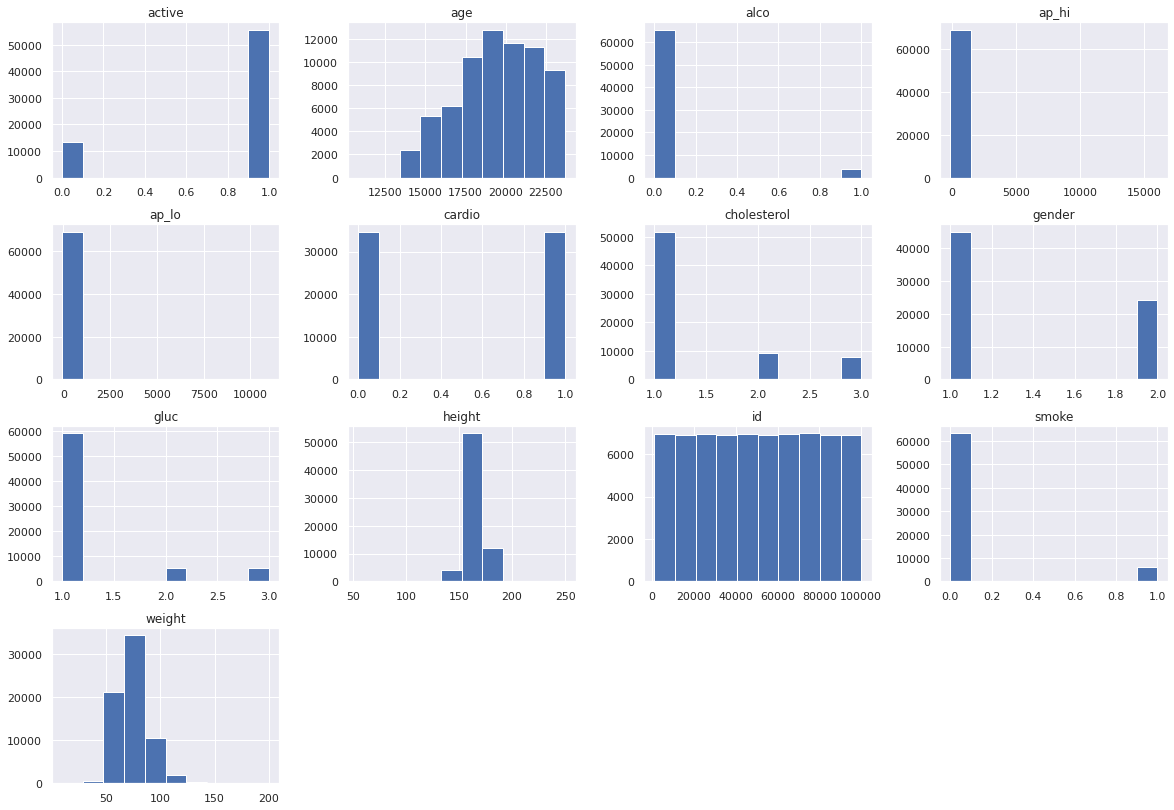

In [87]:
data.hist()

In [88]:
#sns.pairplot(data)

In [89]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [90]:
def continous_data(i):
    if data[i].dtype!='object':
        print('--'*60)
        sns.boxplot(data[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        data[i].plot.hist(bins = 20)
        plt.show()
        plt.clf()

------------------------------------------------------------------------------------------------------------------------


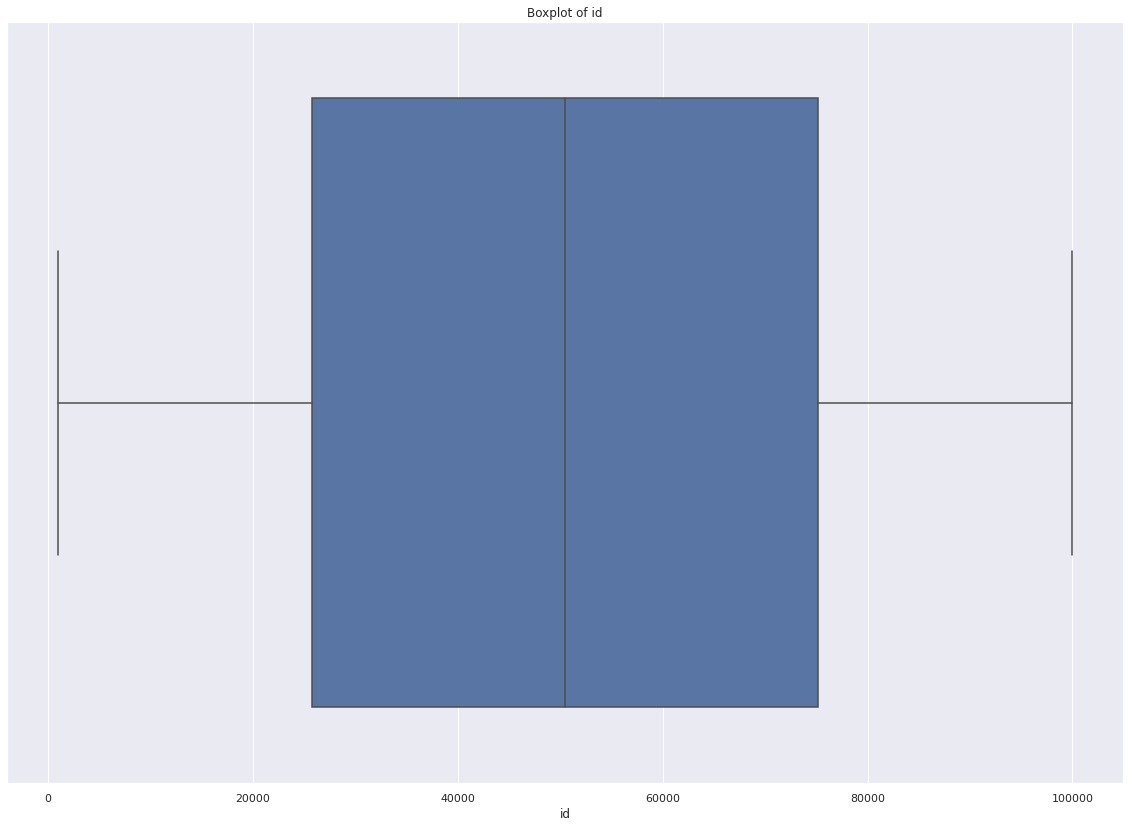

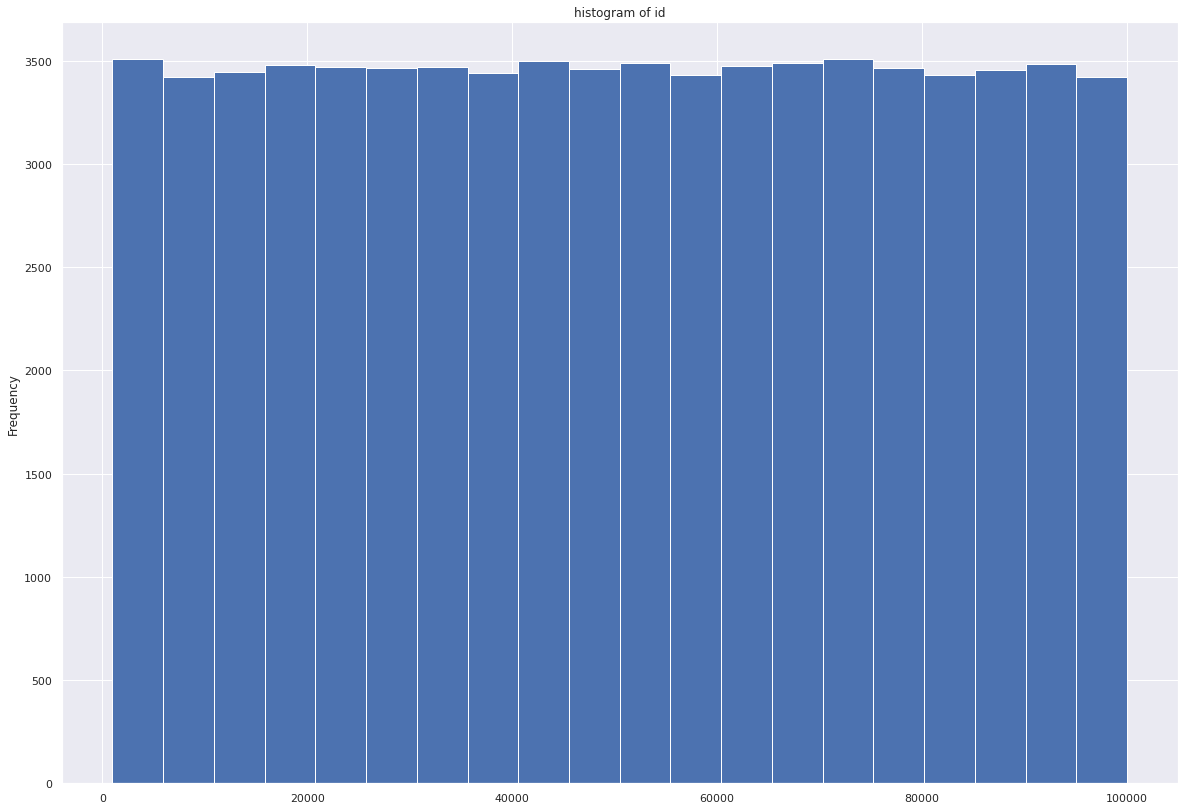

------------------------------------------------------------------------------------------------------------------------


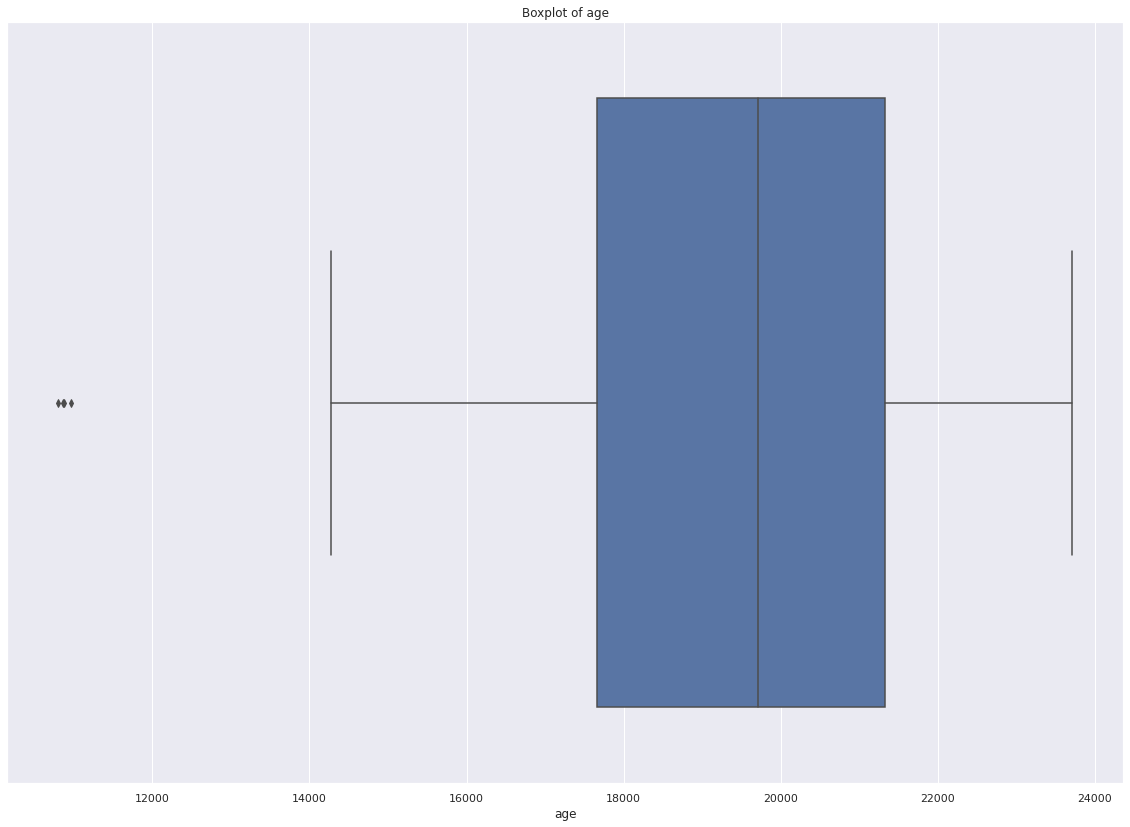

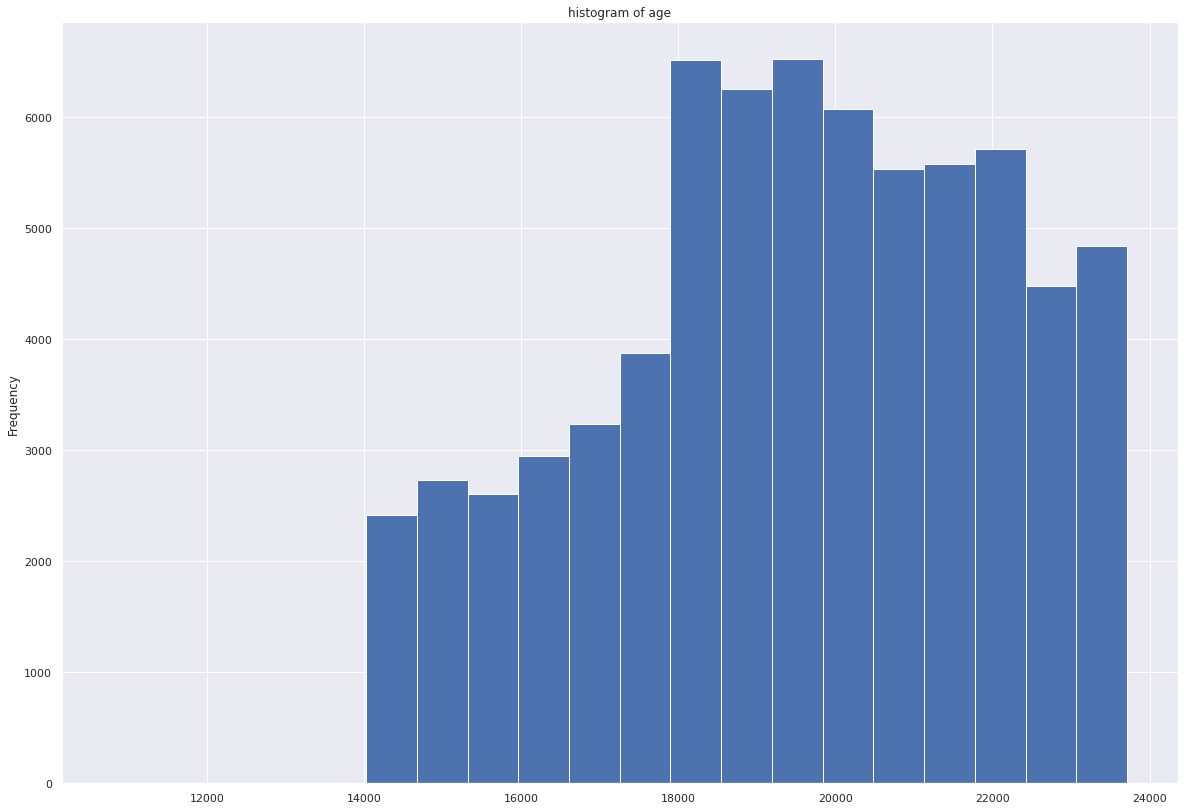

------------------------------------------------------------------------------------------------------------------------


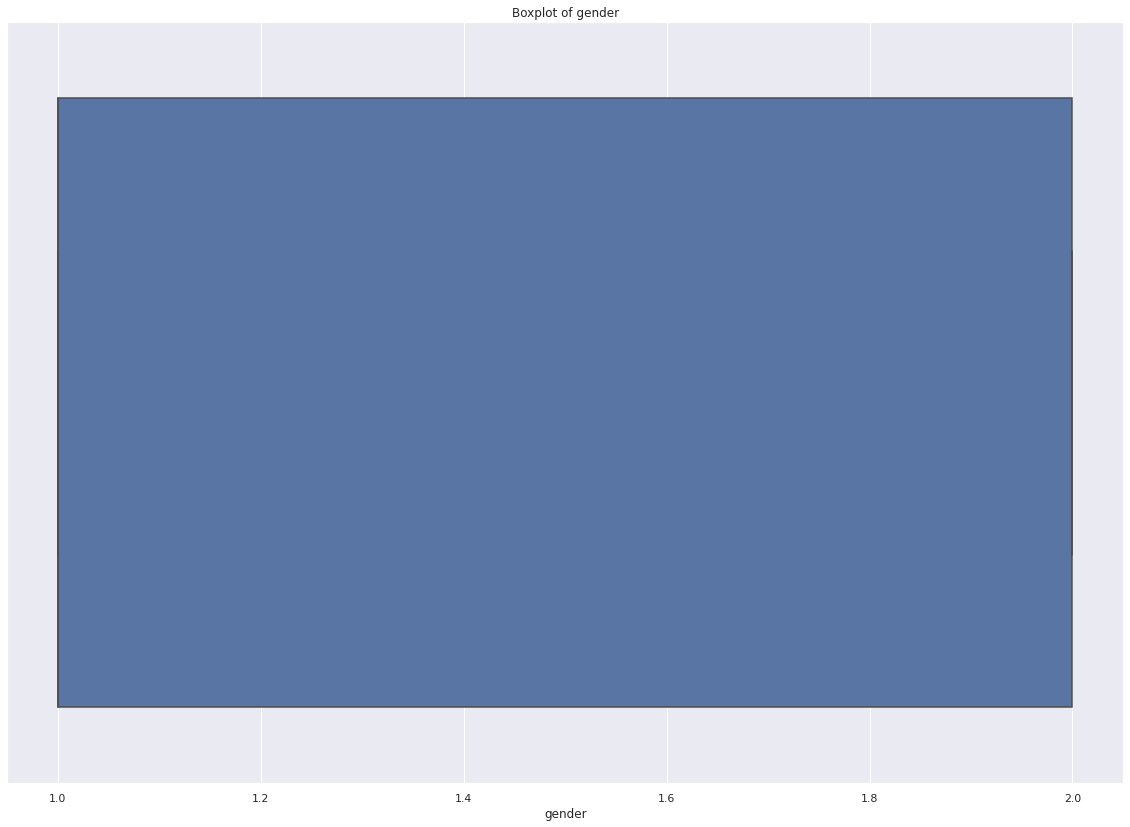

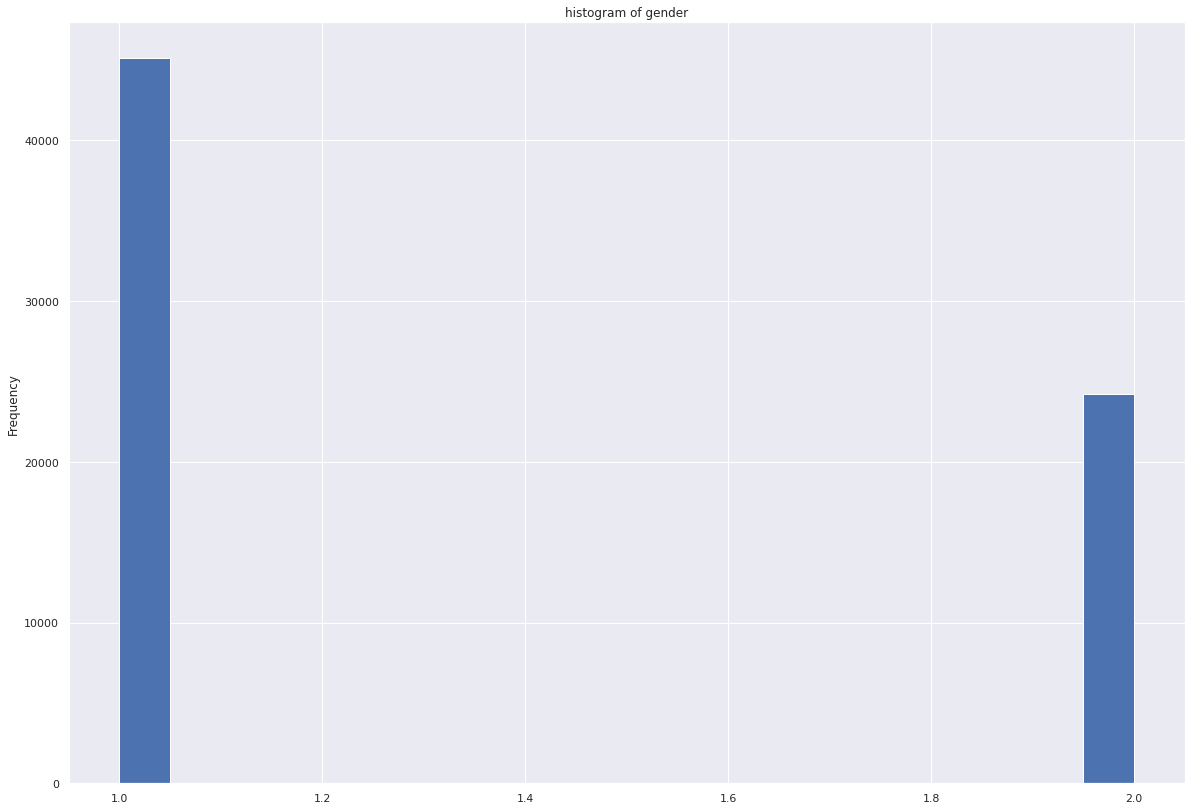

------------------------------------------------------------------------------------------------------------------------


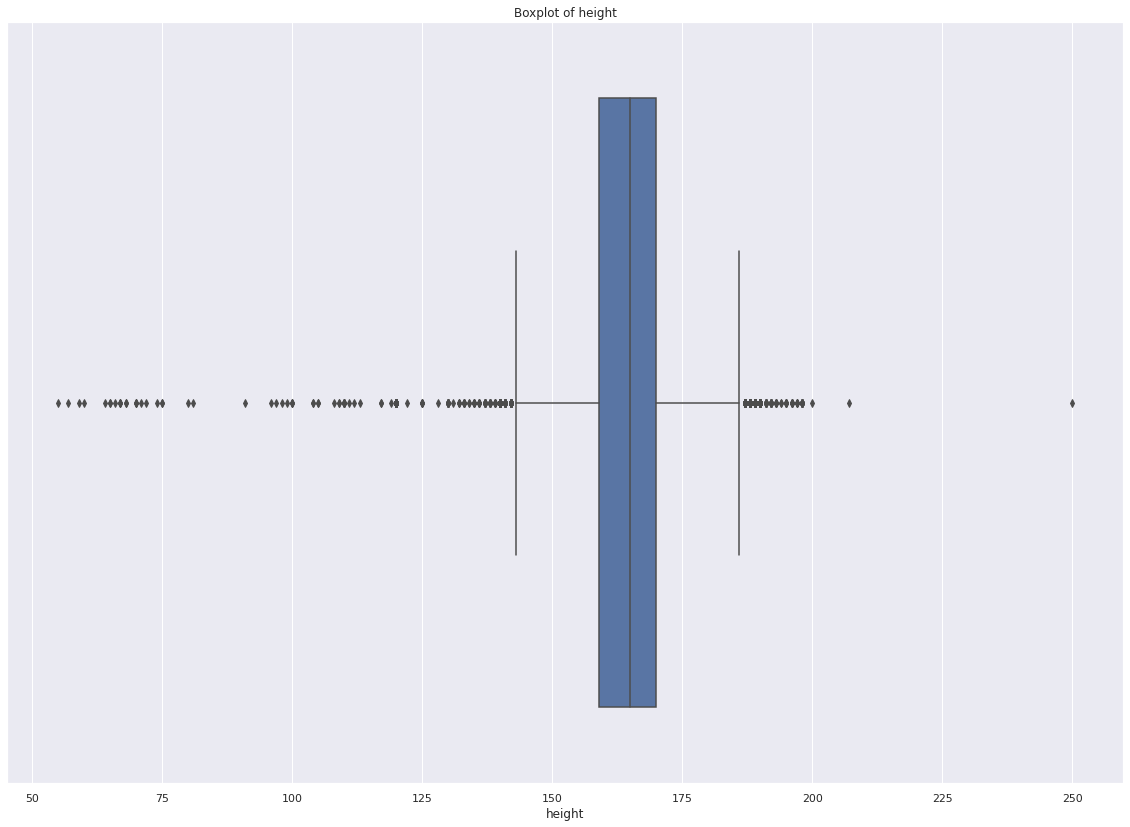

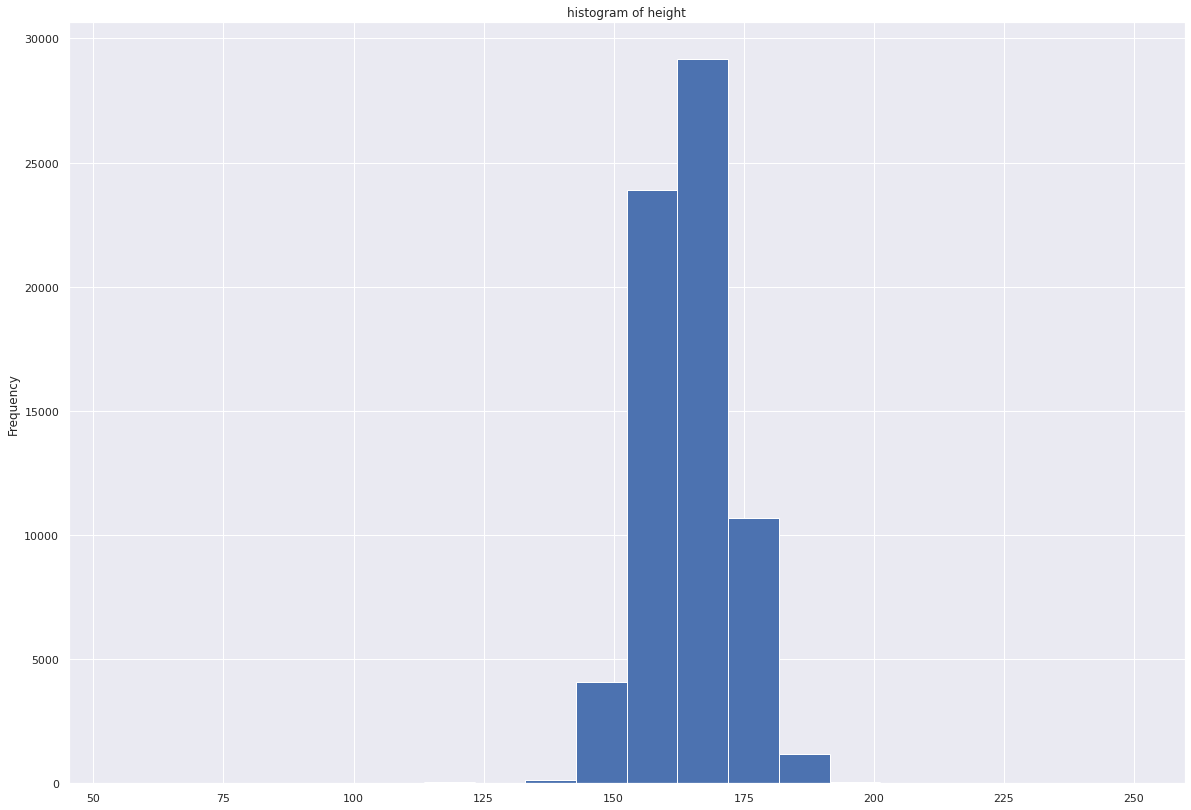

------------------------------------------------------------------------------------------------------------------------


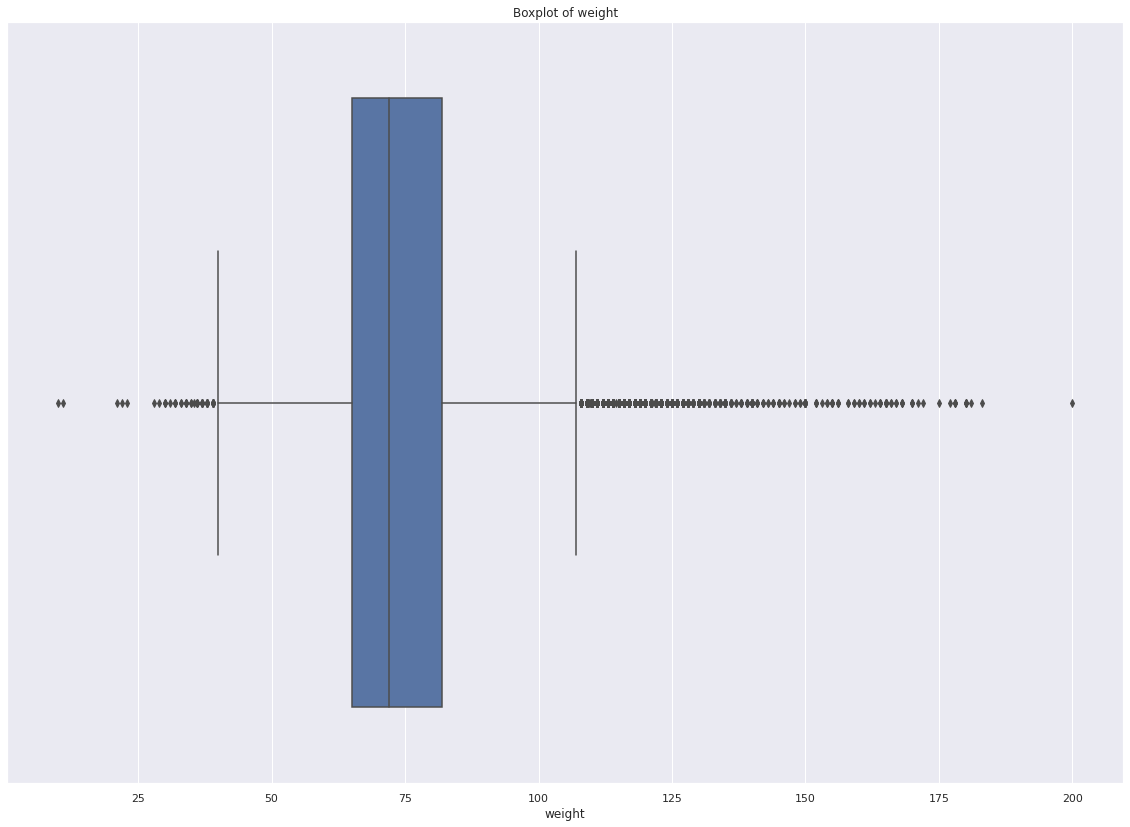

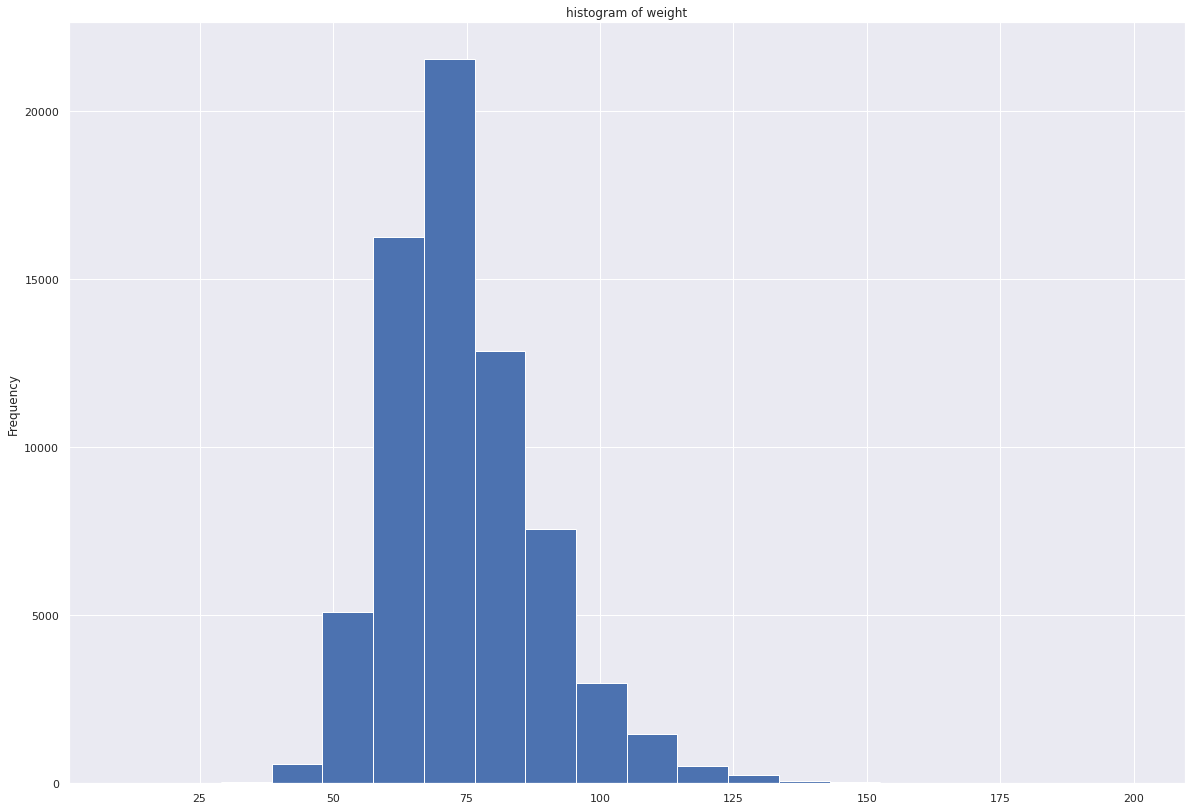

------------------------------------------------------------------------------------------------------------------------


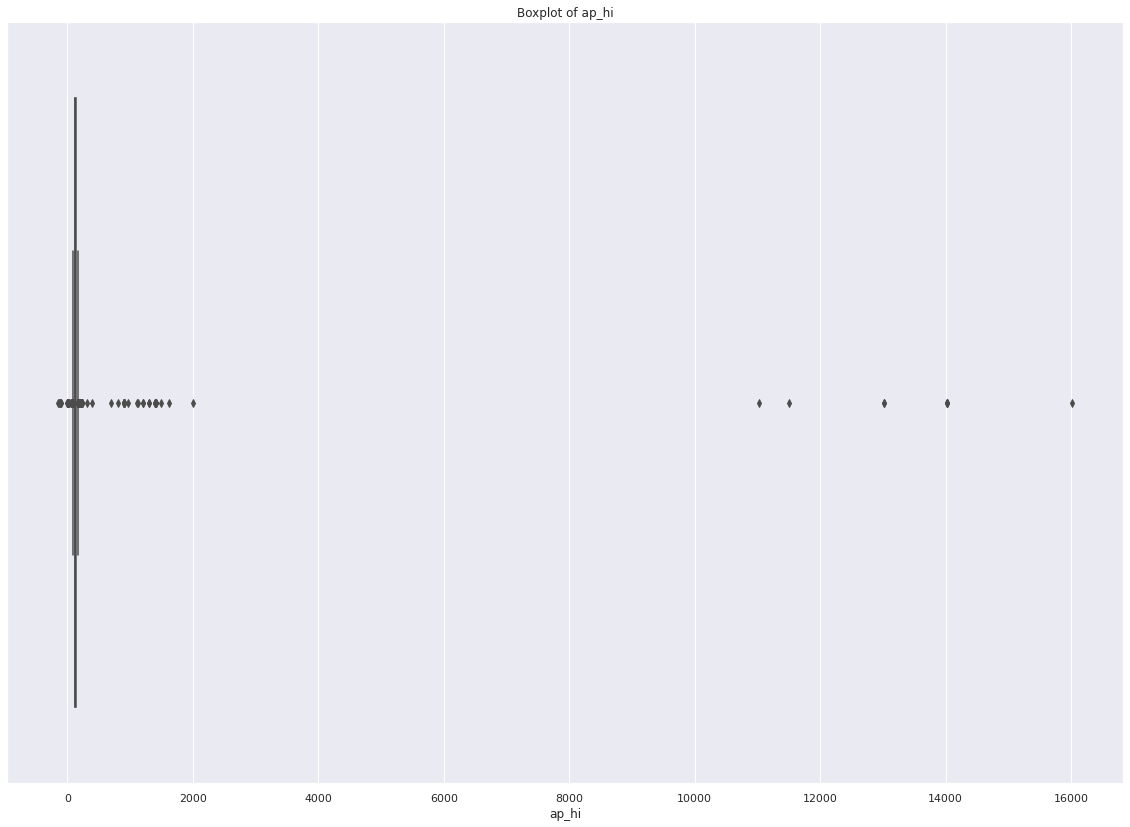

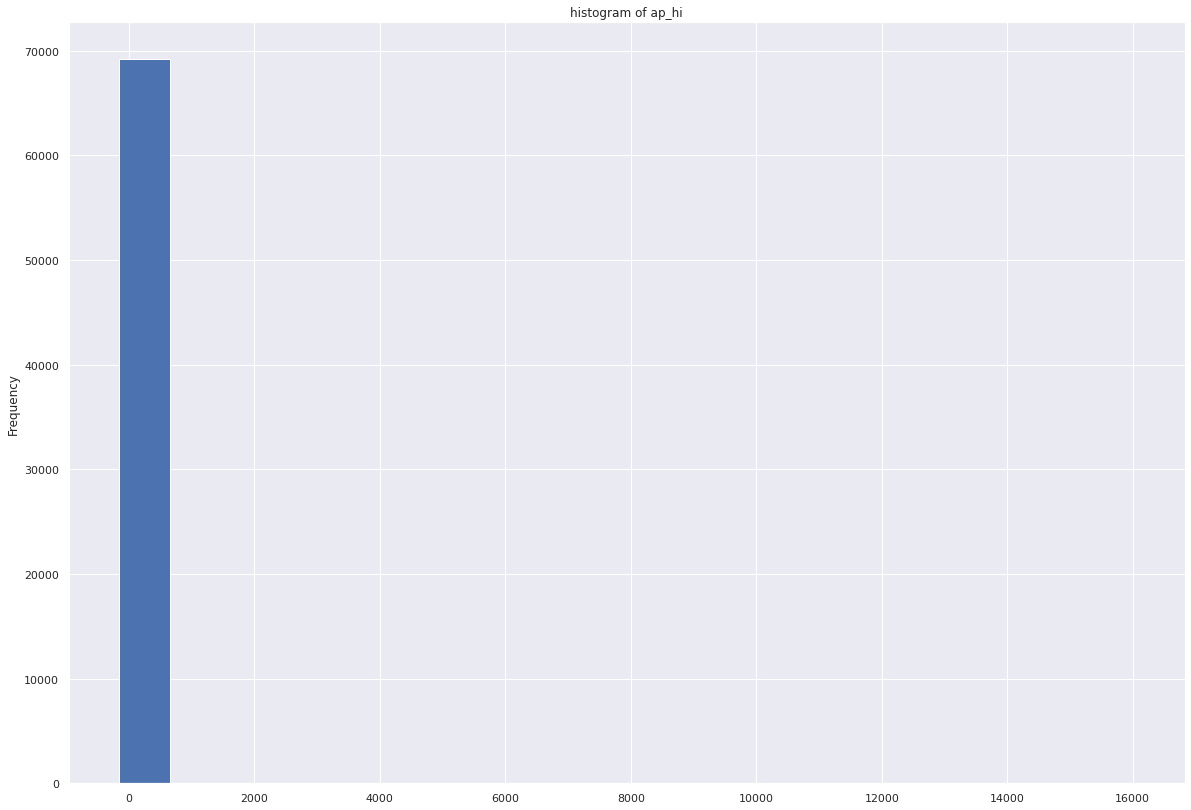

------------------------------------------------------------------------------------------------------------------------


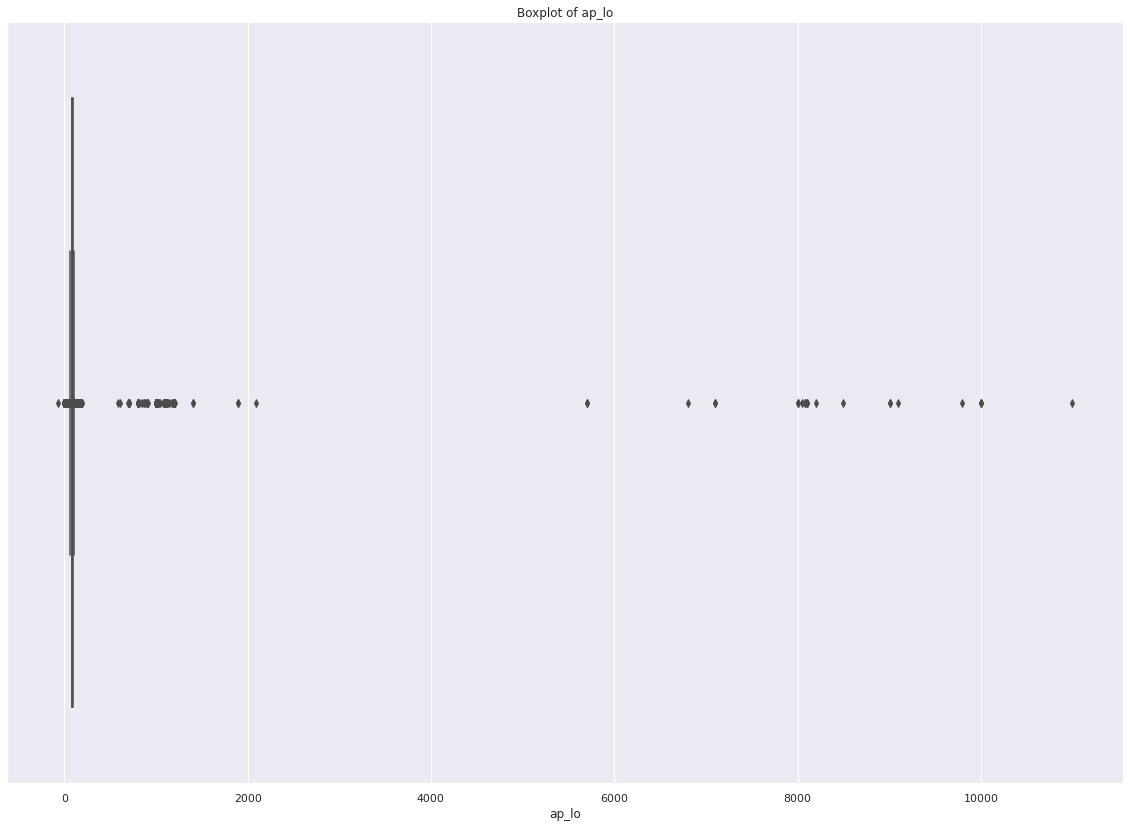

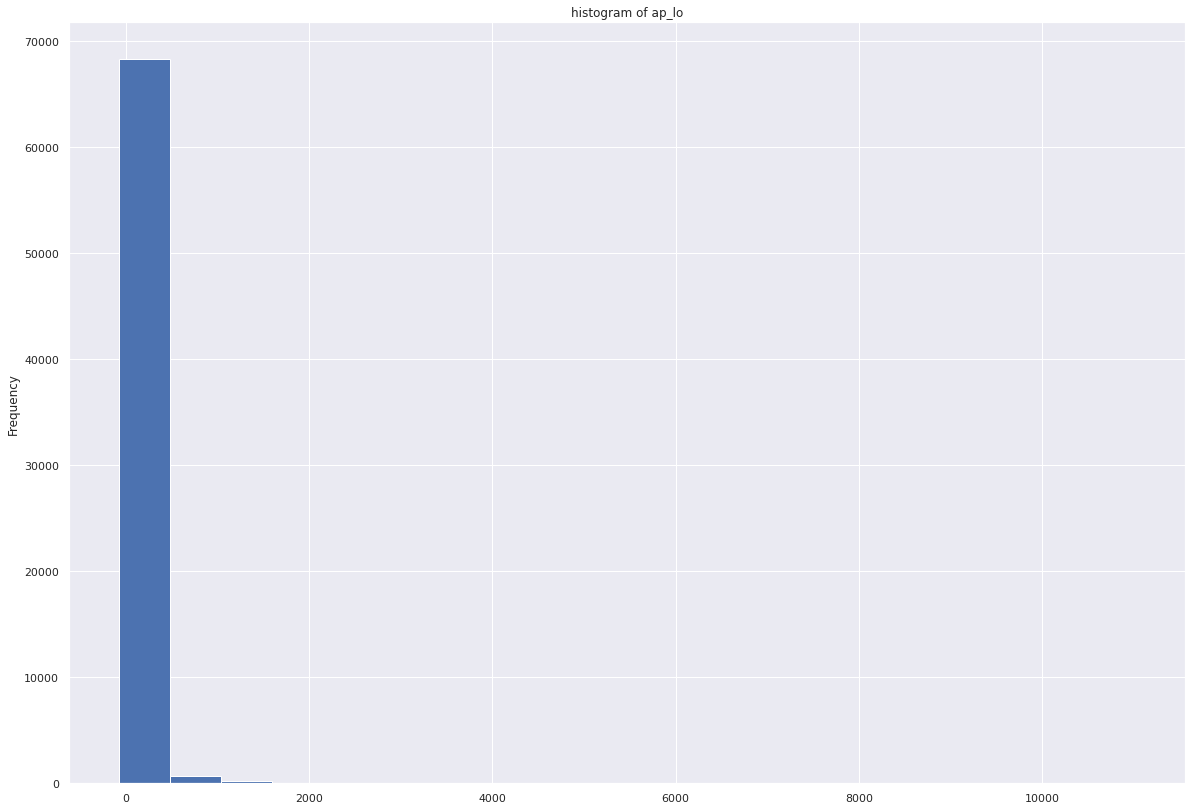

------------------------------------------------------------------------------------------------------------------------


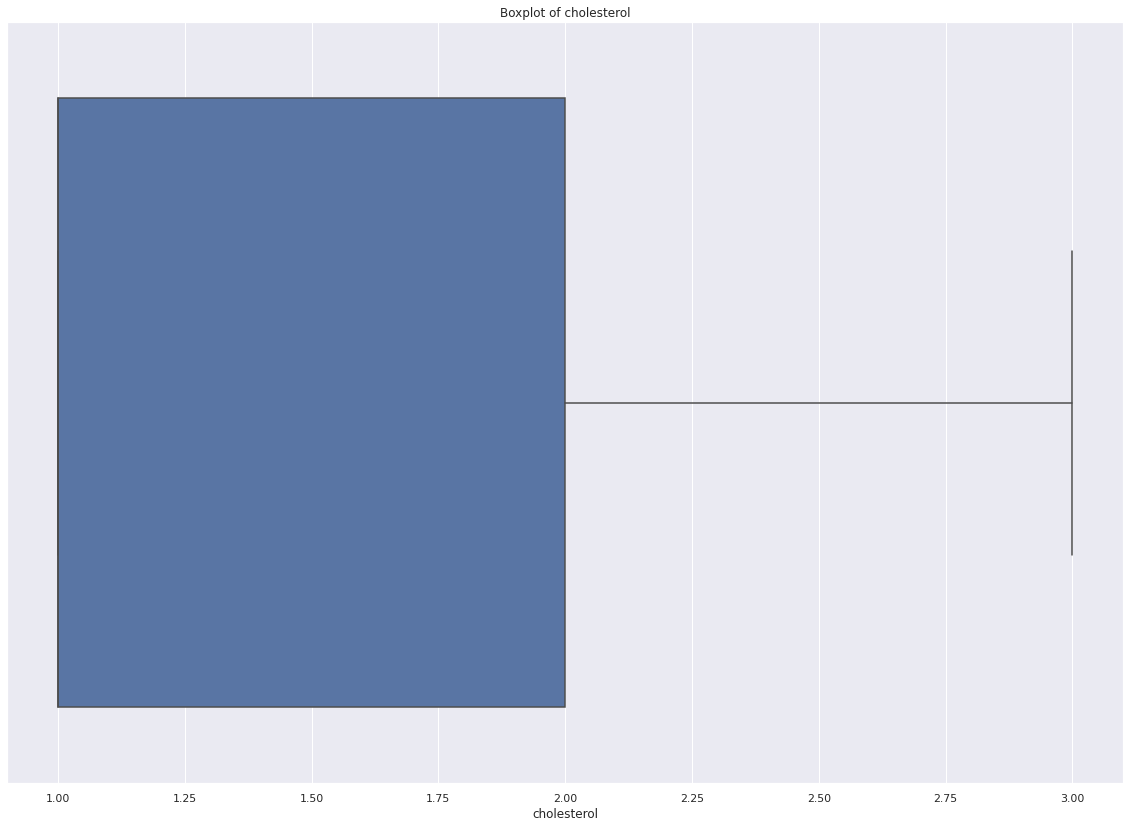

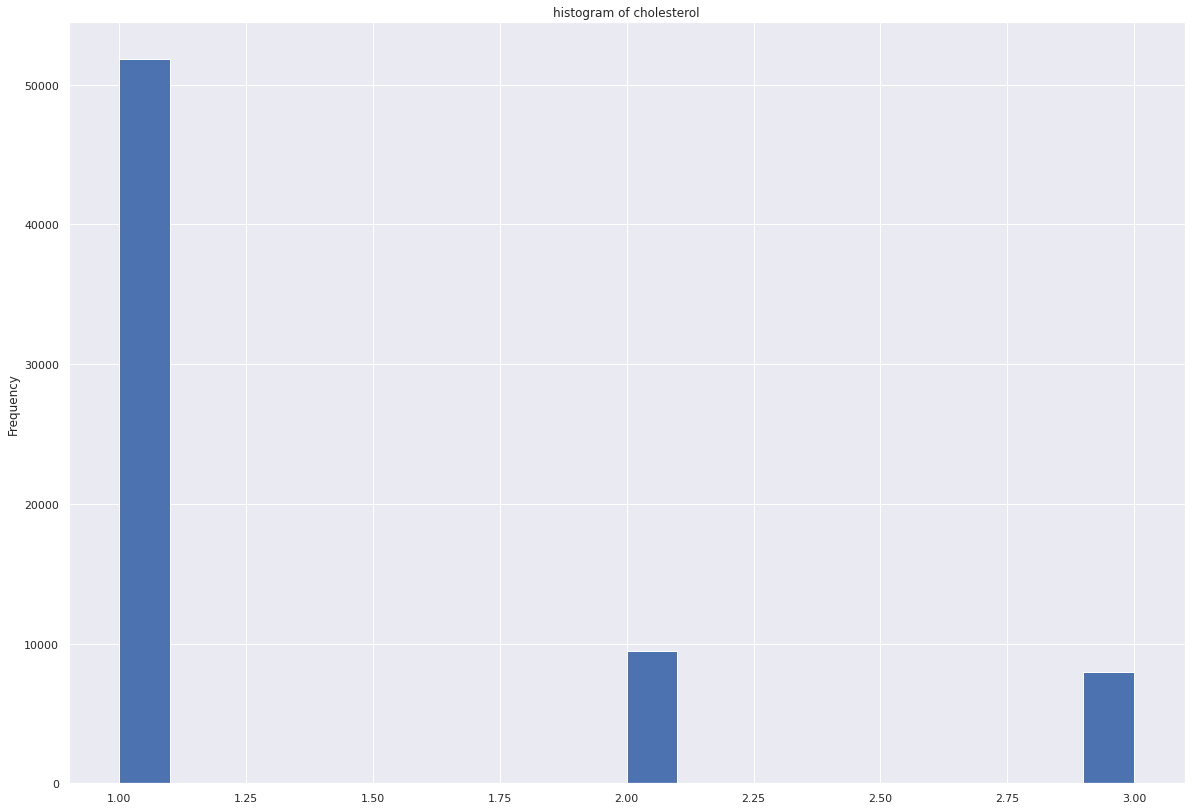

------------------------------------------------------------------------------------------------------------------------


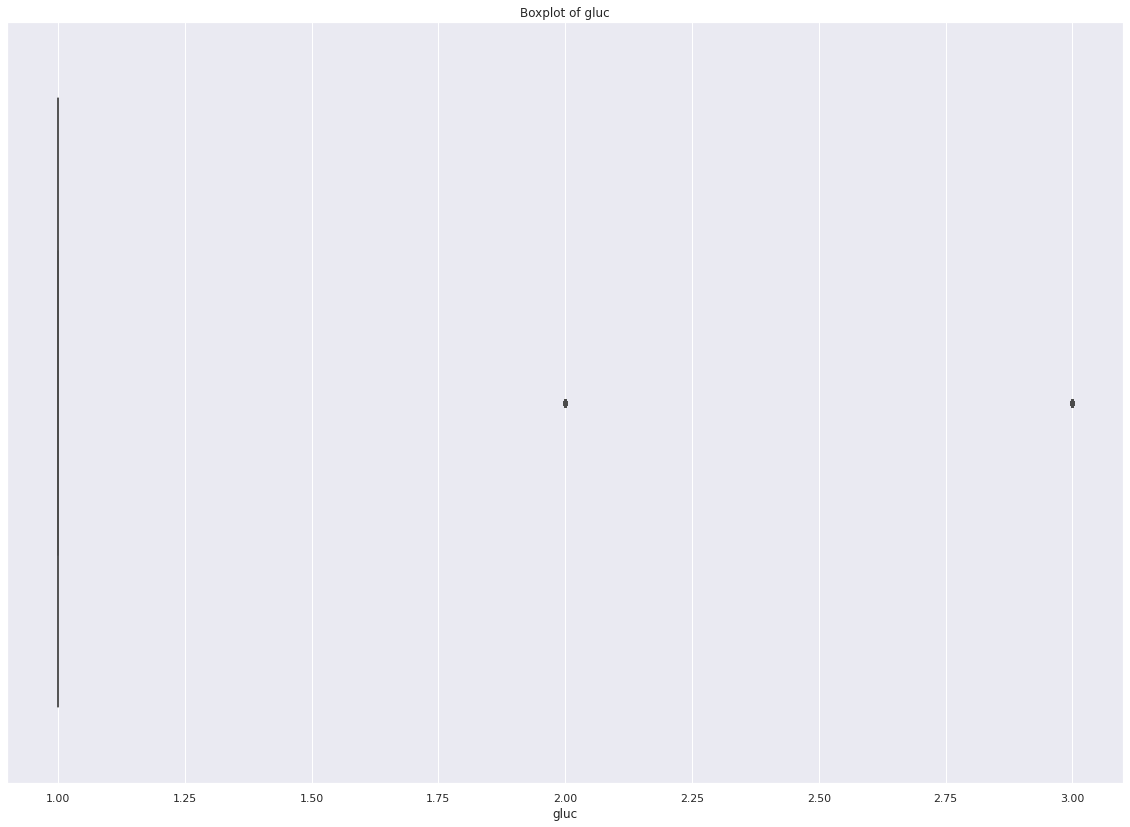

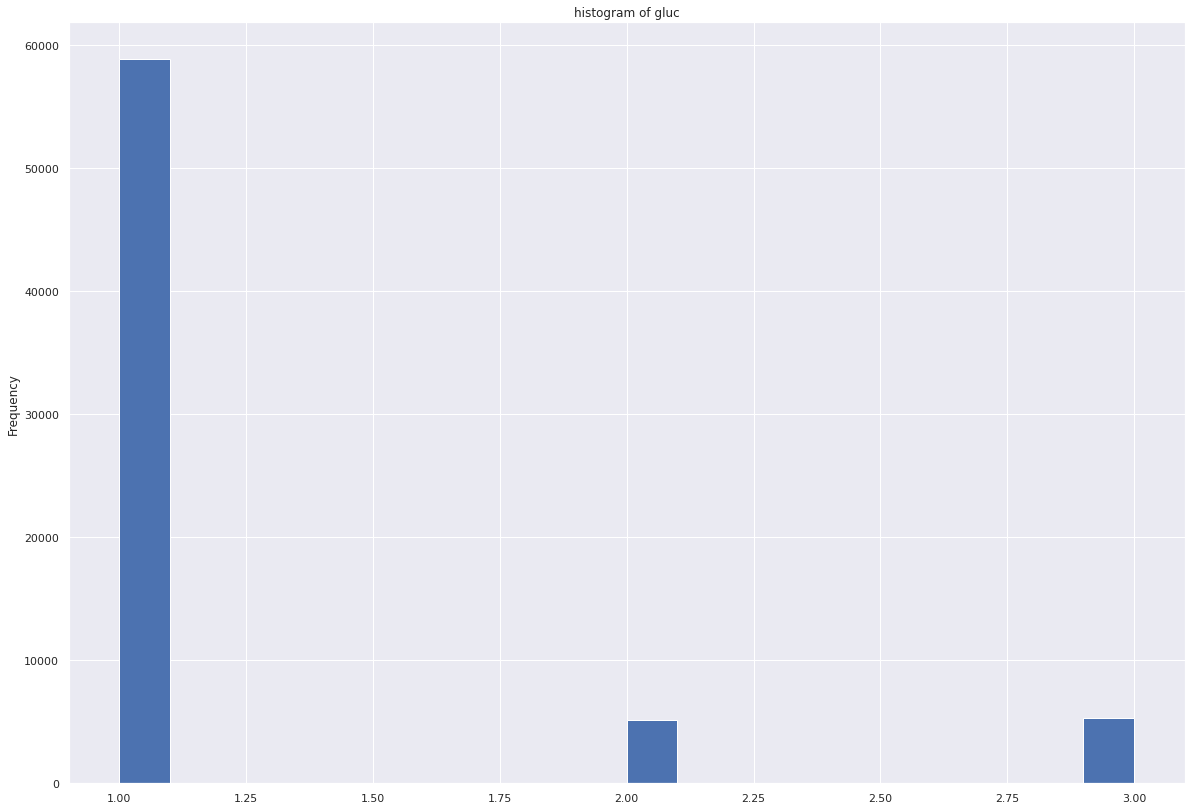

------------------------------------------------------------------------------------------------------------------------


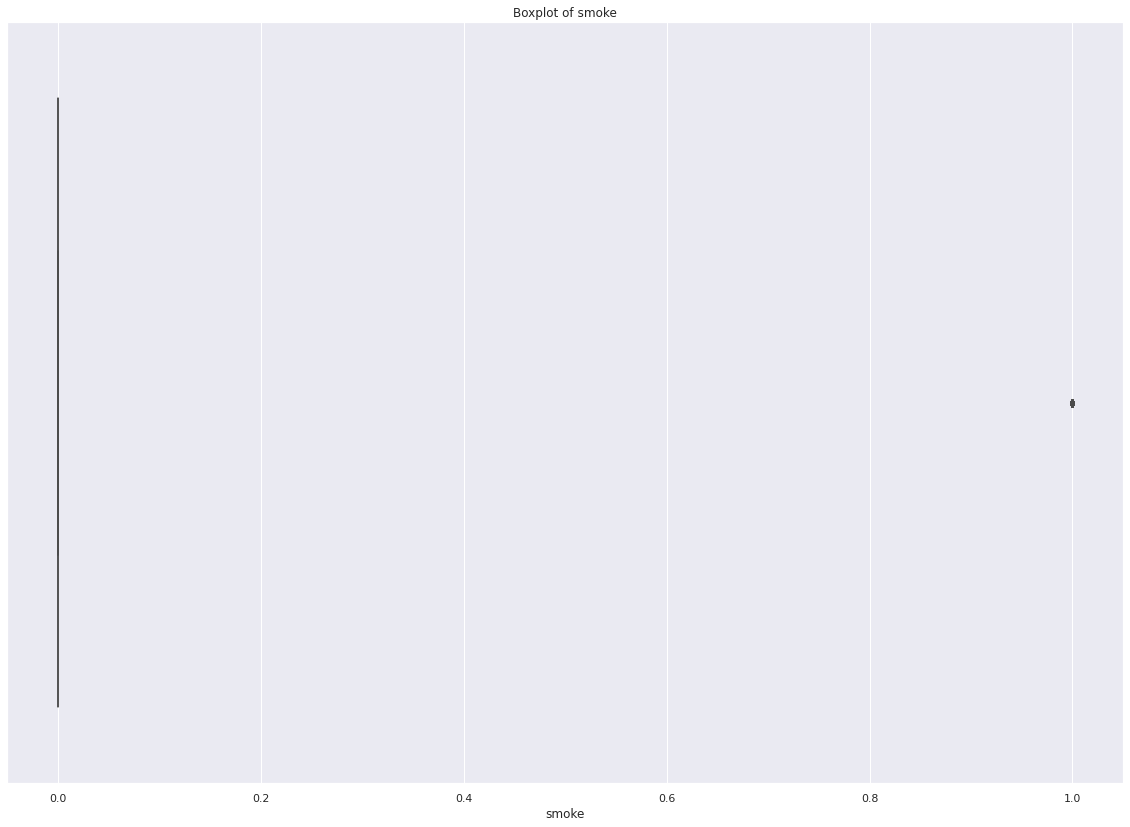

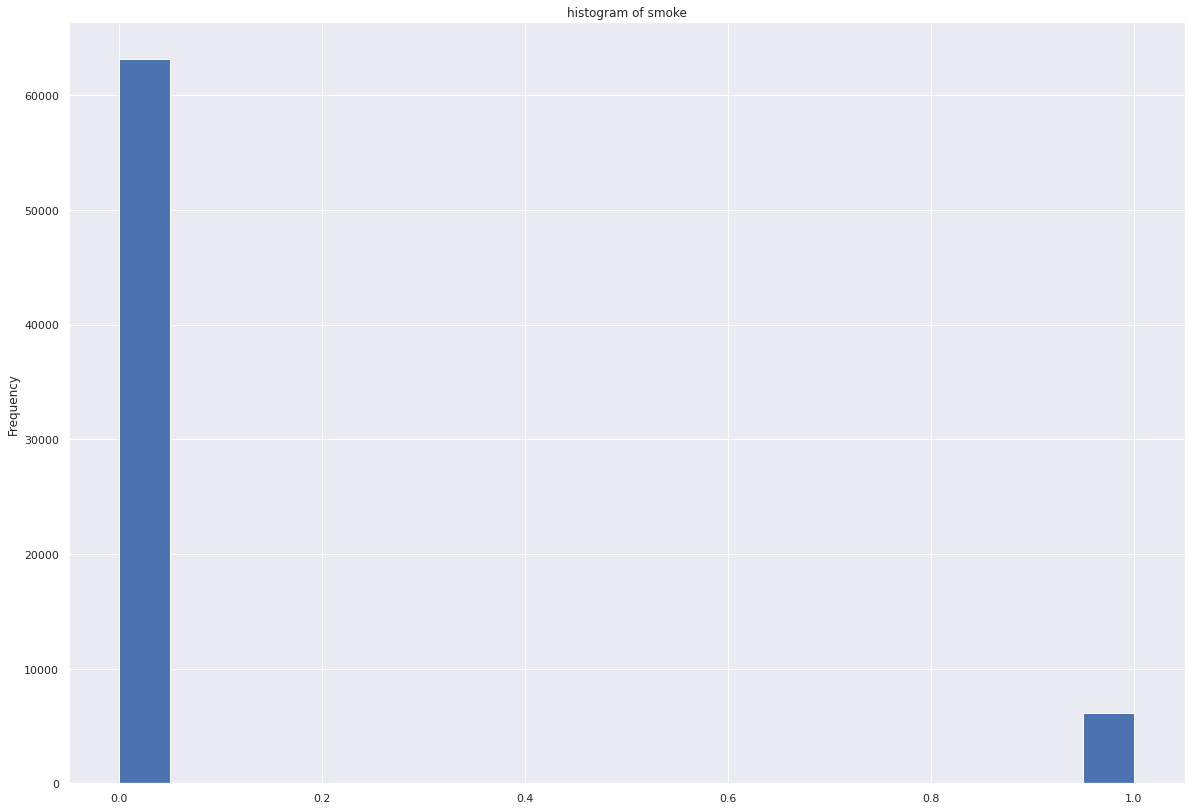

------------------------------------------------------------------------------------------------------------------------


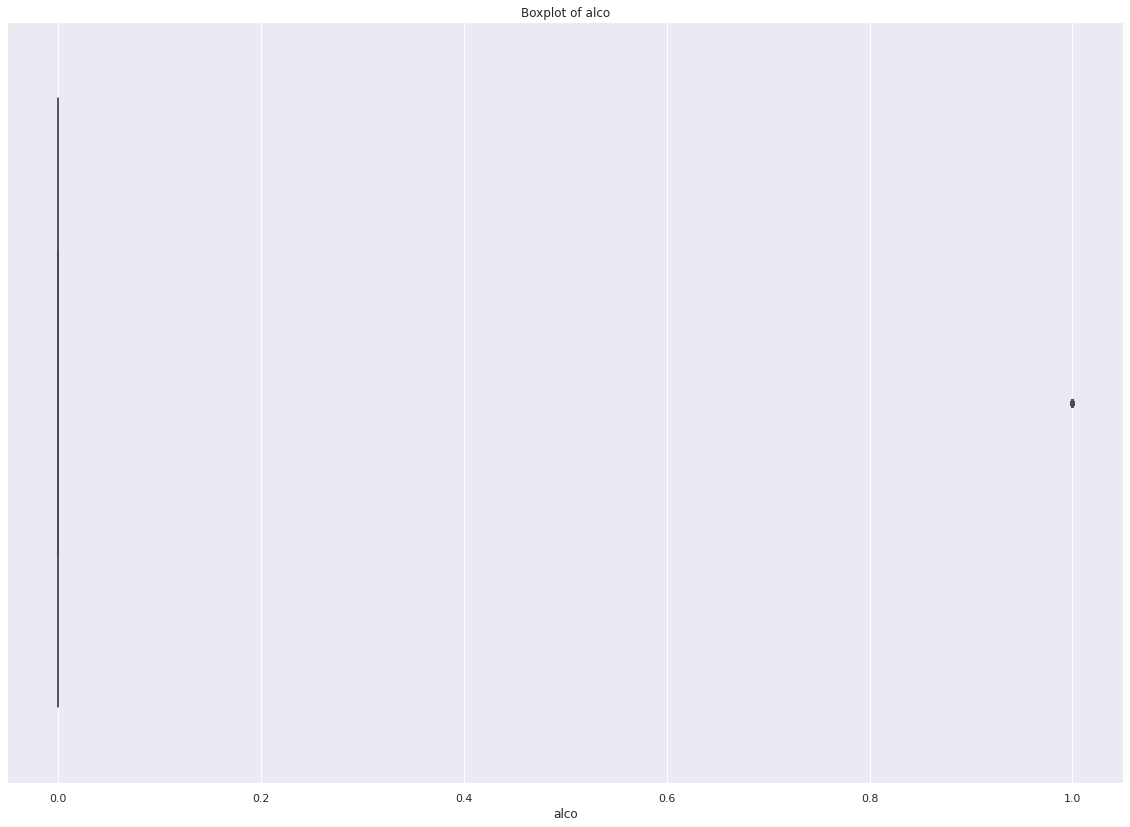

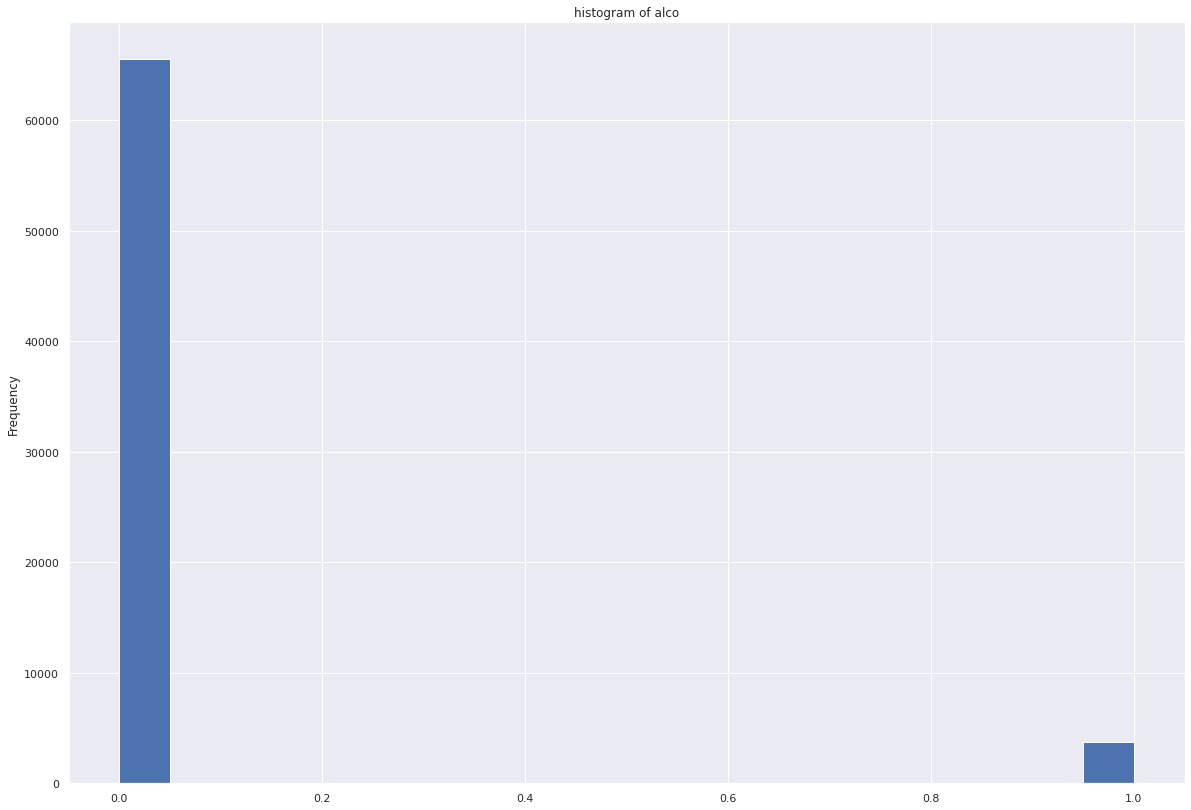

------------------------------------------------------------------------------------------------------------------------


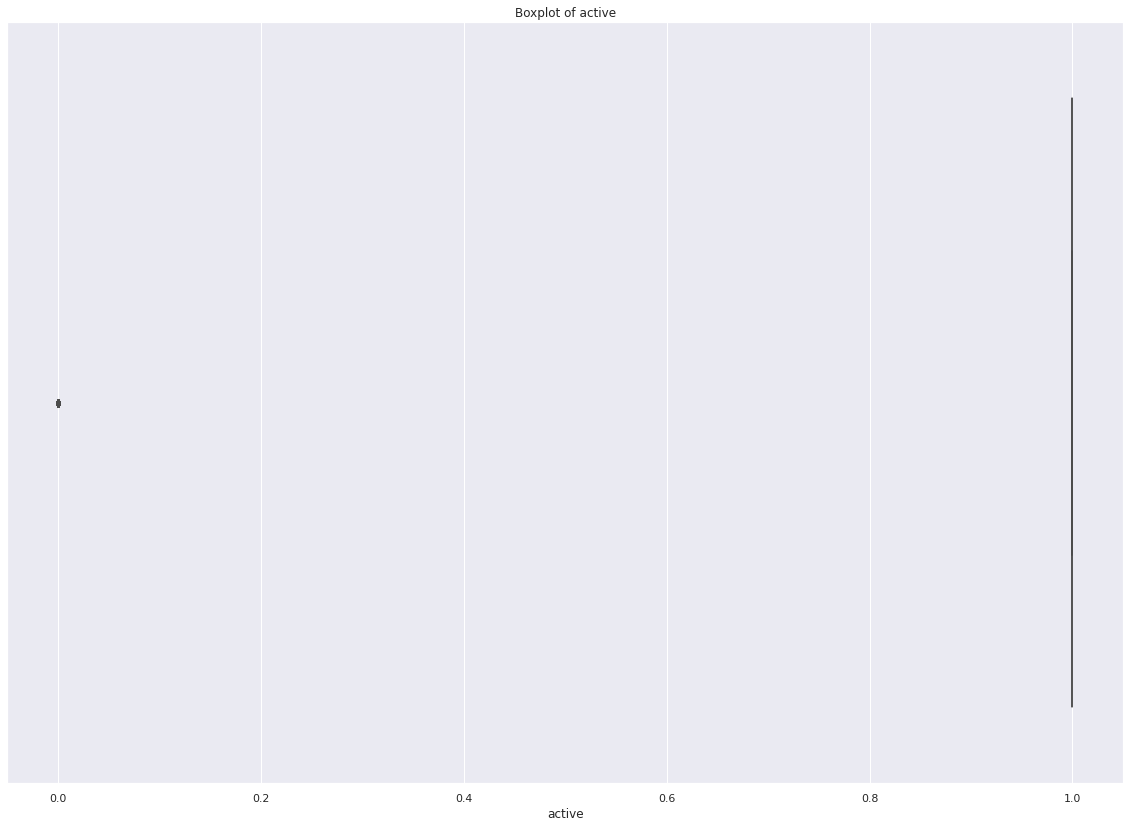

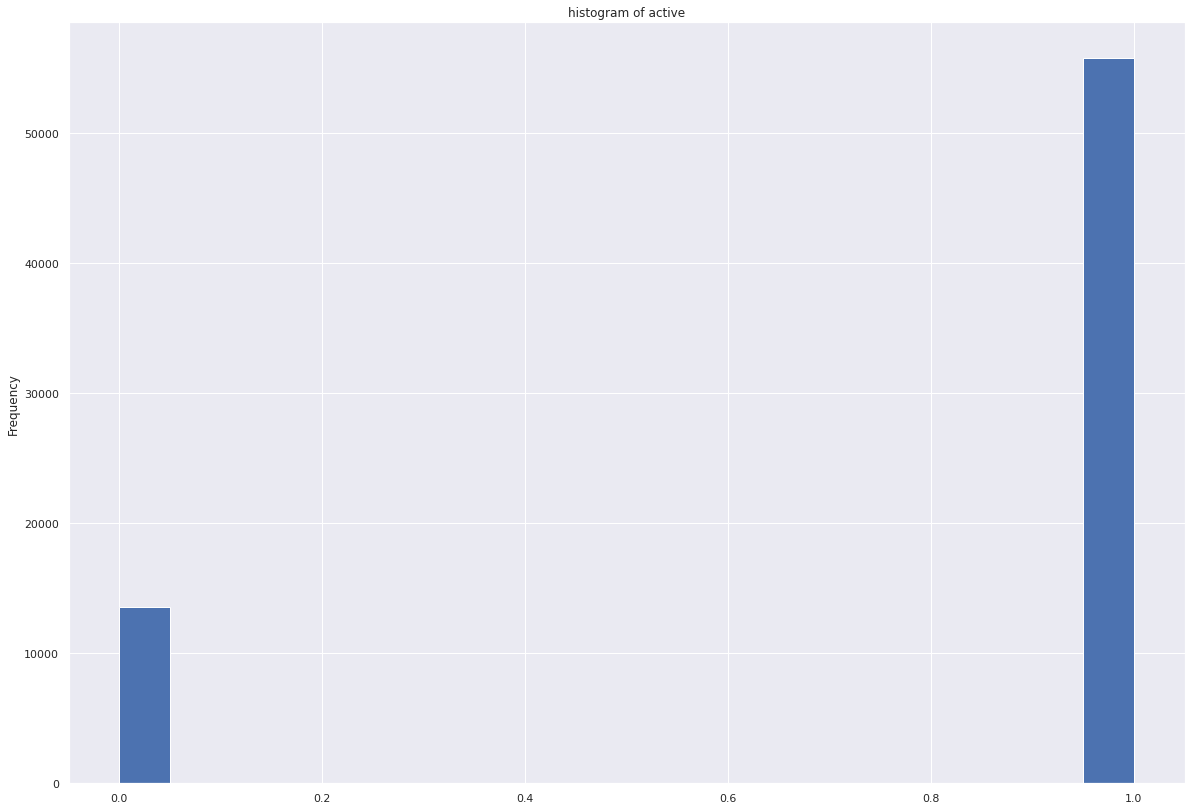

------------------------------------------------------------------------------------------------------------------------


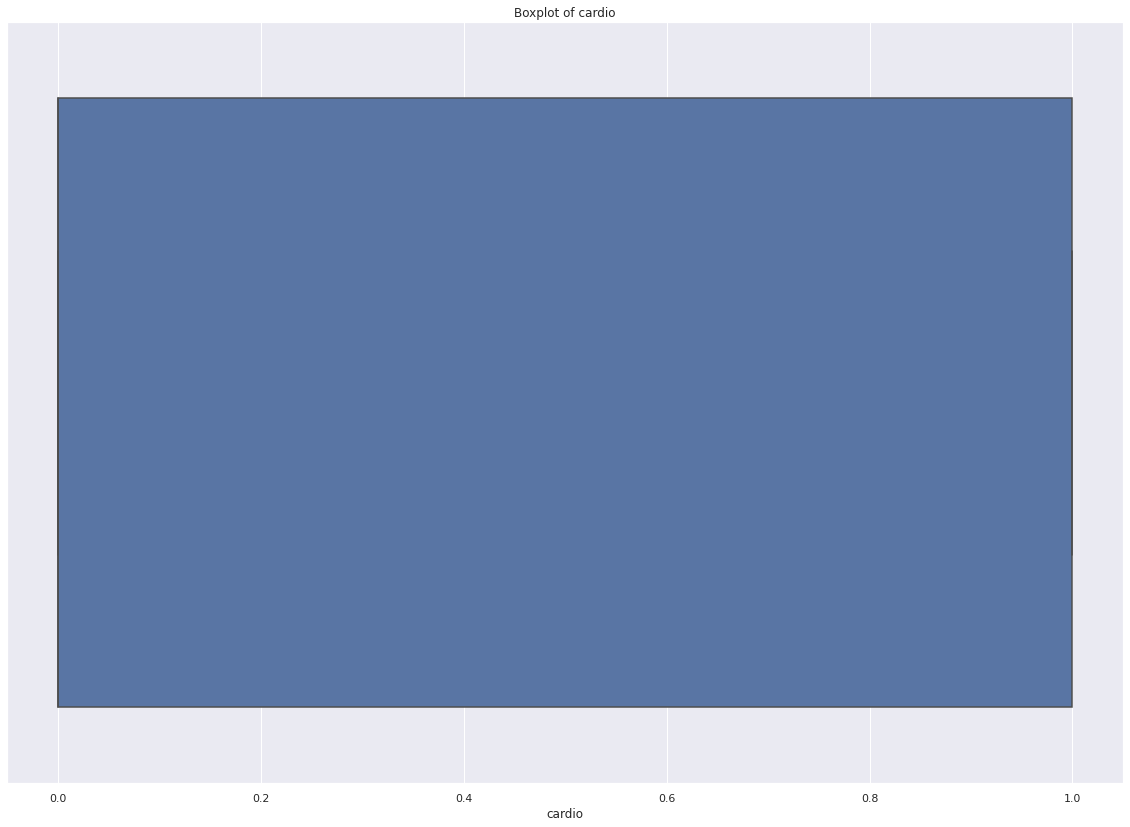

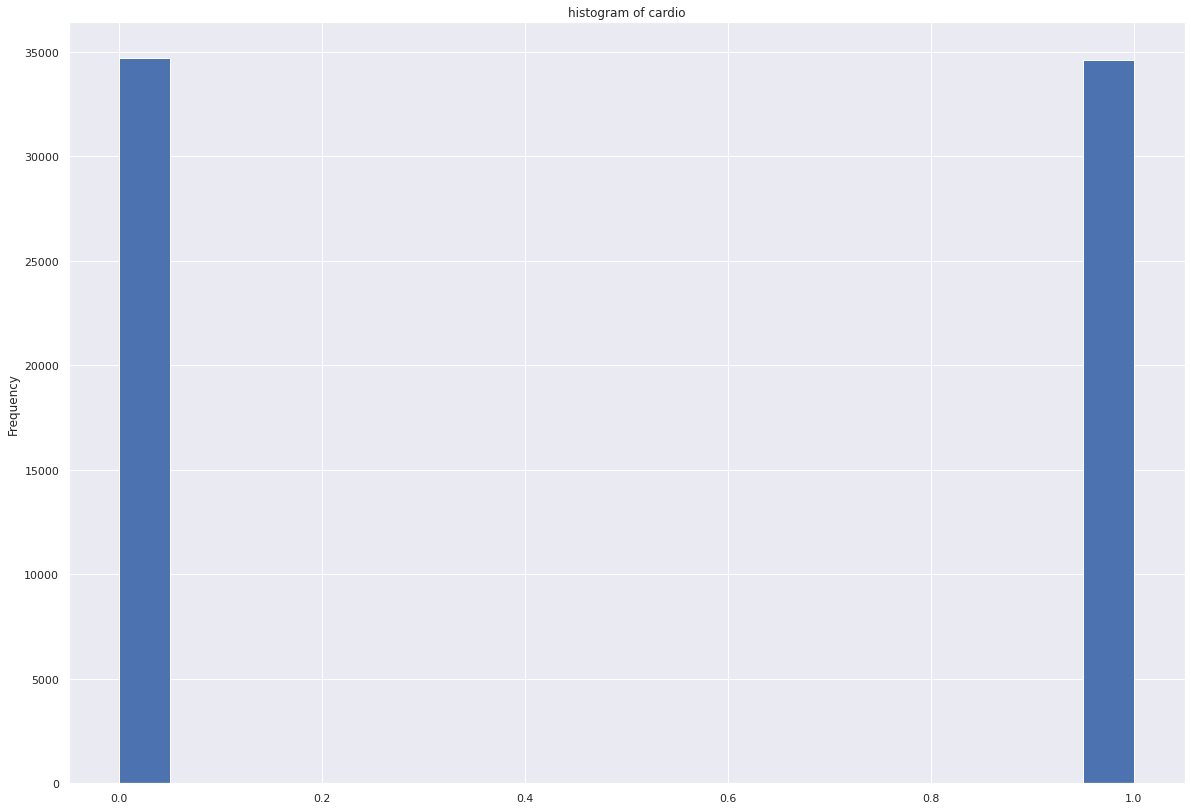

<Figure size 1440x1008 with 0 Axes>

In [91]:
sns.set() #Sets the default seaborn style
j=['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for k in j:
    continous_data(i=k)

In [92]:
# Corr wrt Target Index
num_feat = data.select_dtypes(include=['float64','int64']) 
data_corr = num_feat.corr()['cardio'][:-1]
data_corr
#print(type(data_corr))

id             0.004269
age            0.238095
gender         0.008592
height        -0.011015
weight         0.182094
ap_hi          0.054211
ap_lo          0.065290
cholesterol    0.220752
gluc           0.089062
smoke         -0.015225
alco          -0.007217
active        -0.035592
Name: cardio, dtype: float64

## Split Data in Features & Target

In [93]:
dataset = data.copy()
dataset=dataset.drop(["id"],axis=1)


In [94]:
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [95]:
X_feature=dataset.drop(["cardio"],axis=1)
Y_target=dataset["cardio"]

In [96]:
print(X_feature.shape)
print(Y_target.shape)

print(type(X_feature))
X_feature

(69301, 11)
(69301,)
<class 'pandas.core.frame.DataFrame'>


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
3,14549,2,165,85.0,120,80,1,1,1,1,1
4,23393,1,155,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1
69297,22601,1,158,126.0,140,90,2,2,0,0,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0
69299,22431,1,163,72.0,135,80,1,2,0,0,0


# Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [98]:
X_feature_scaled = sc.fit_transform(X_feature)
X_feature_scaled

array([[ 1.21601824, -0.73302344, -1.14099939, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.95391548, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.98580185, -0.73302344,  0.07772839, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [-0.16325352,  1.36421285,  2.27143838, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.20061644, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 0.43417421, -0.73302344,  0.68709227, ..., -0.31072844,
        -0.23864069,  0.49376463]])

# Split data in Training and Testing 

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_feature_scaled,Y_target,test_size=0.2,random_state=101)

# Modeling 

In [100]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_log)
acc_test_log = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_log)

Training Accuracy: 71.99
Testing Accuracy: 71.64


**Confusion Matrix & Classification Report**

[[5273 1654]
 [2277 4657]]


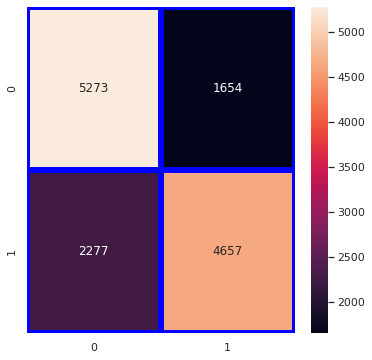

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6927
           1       0.74      0.67      0.70      6934

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.72     13861
weighted avg       0.72      0.72      0.72     13861



In [123]:
Ya = y_test  # Real Value
Yp = logreg.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(Ya,Yp)
print(cm_logreg)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_logreg,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

**ROC & AUC Curve**

[[0.66602315 0.33397685]
 [0.32167358 0.67832642]
 [0.40313532 0.59686468]
 ...
 [0.13358645 0.86641355]
 [0.33242093 0.66757907]
 [0.56769116 0.43230884]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   1
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.33397685 0.67832642 0.59686468 ... 0.86641355 0.66757907 0.43230884]
AUC is 0.78


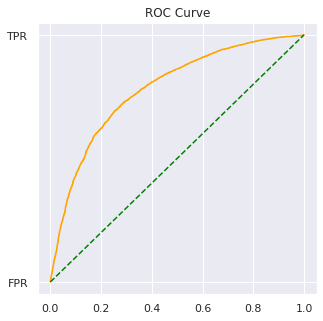

In [124]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = logreg.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)  

In [128]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
svc.fit(x_train, y_train)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_svc)
acc_test_svc = round(svc.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_svc)

Training Accuracy: 73.27
Testing Accuracy: 72.57


[[5258 1669]
 [2133 4801]]


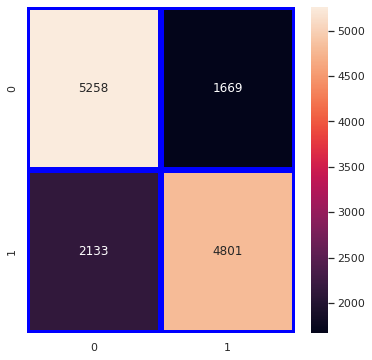

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6927
           1       0.74      0.69      0.72      6934

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861



In [129]:
Ya = y_test  # Real Value
Yp = svc.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(Ya,Yp)
print(cm_svc)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_svc,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.58543838 0.41456162]
 [0.31196637 0.68803363]
 [0.26527461 0.73472539]
 ...
 [0.26259145 0.73740855]
 [0.26768298 0.73231702]
 [0.66269748 0.33730252]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   1
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.41456162 0.68803363 0.73472539 ... 0.73740855 0.73231702 0.33730252]
AUC is 0.78


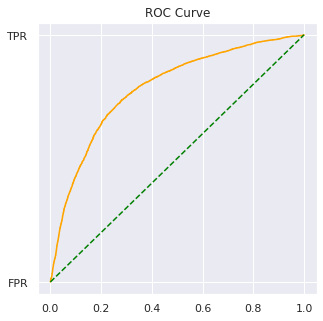

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = svc.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr) 

In [131]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(x_train, y_train)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_knn,knn.best_params_)
acc_test_knn = round(knn.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_knn)

Training Accuracy: 80.74 {'n_neighbors': 3}
Testing Accuracy: 63.72


[[4580 2347]
 [2682 4252]]


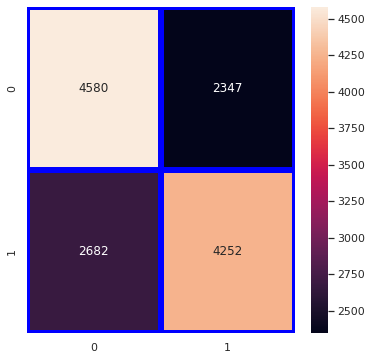

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6927
           1       0.64      0.61      0.63      6934

    accuracy                           0.64     13861
   macro avg       0.64      0.64      0.64     13861
weighted avg       0.64      0.64      0.64     13861



In [132]:
Ya = y_test  # Real Value
Yp = knn.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Ya,Yp)
print(cm_knn)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_knn,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 ...
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [1.         0.        ]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   1
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   0
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.33333333 0.66666667 0.66666667 ... 0.66666667 0.33333333 0.        ]
AUC is 0.67


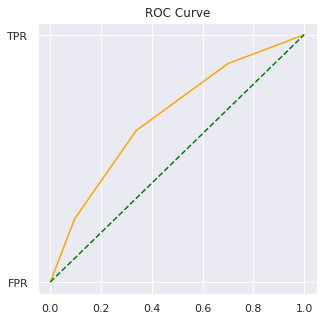

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = knn.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr) 

In [134]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_decision_tree)
acc_test_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_decision_tree)

Training Accuracy: 99.97
Testing Accuracy: 63.47


[[4414 2513]
 [2550 4384]]


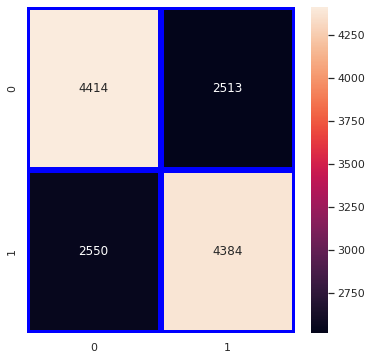

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      6927
           1       0.64      0.63      0.63      6934

    accuracy                           0.63     13861
   macro avg       0.63      0.63      0.63     13861
weighted avg       0.63      0.63      0.63     13861



In [135]:
Ya = y_test  # Real Value
Yp = decision_tree.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_decision_tree = confusion_matrix(Ya,Yp)
print(cm_decision_tree)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_decision_tree,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   1
1       0   1
2       0   0
3       1   1
4       0   1
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [1. 1. 0. ... 1. 1. 0.]
AUC is 0.63


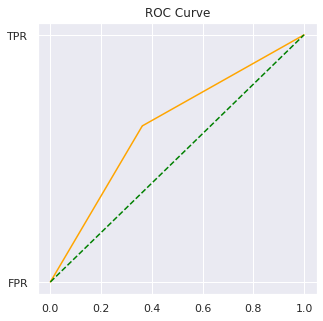

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = decision_tree.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr) 

In [137]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(x_train, y_train)
random_forest.fit(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_random_forest,random_forest.best_params_)
acc_test_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_random_forest)

Training Accuracy: 99.97 {'n_estimators': 100}
Testing Accuracy: 71.52


[[5071 1856]
 [2092 4842]]


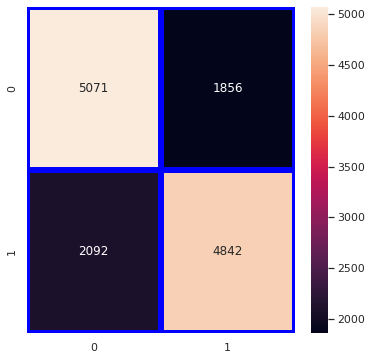

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6927
           1       0.72      0.70      0.71      6934

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.72     13861
weighted avg       0.72      0.72      0.72     13861



In [138]:
Ya = y_test  # Real Value
Yp = random_forest.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_random_forest = confusion_matrix(Ya,Yp)
print(cm_random_forest)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_random_forest,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.5  0.5 ]
 [0.34 0.66]
 [0.57 0.43]
 ...
 [0.28 0.72]
 [0.26 0.74]
 [0.85 0.15]]
Length of X_test:  13861
length of Log_Model_prob:  13861
       Ya  Yp
0       0   0
1       0   1
2       0   0
3       1   1
4       0   0
...    ..  ..
13856   0   0
13857   0   0
13858   1   1
13859   1   1
13860   1   0

[13861 rows x 2 columns]
Prob. of 1 at given X:  [0.5  0.66 0.43 ... 0.72 0.74 0.15]
AUC is 0.78


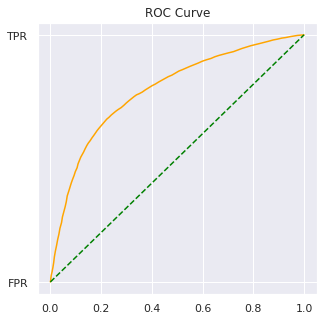

In [139]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = random_forest.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)  

**NN Model**

In [141]:
# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Dense(16, input_dim = x_train.shape[1], init = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, init = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, init = 'he_normal', activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
____________________________________________________

In [142]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
es = EarlyStopping(monitor='val_accuracy', patience=20, mode='max')
hist = model.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), 
               epochs=500, verbose=1, callbacks=[es])

Train on 55440 samples, validate on 13861 samples
Epoch 1/500
55440/55440 [==============================] - 2s 37us/step - loss: 0.6707 - accuracy: 0.6056 - val_loss: 0.6333 - val_accuracy: 0.6505
Epoch 2/500
55440/55440 [==============================] - 2s 28us/step - loss: 0.6401 - accuracy: 0.6373 - val_loss: 0.6179 - val_accuracy: 0.6629
Epoch 3/500
55440/55440 [==============================] - 2s 27us/step - loss: 0.6259 - accuracy: 0.6540 - val_loss: 0.6064 - val_accuracy: 0.6783
Epoch 4/500
55440/55440 [==============================] - 2s 27us/step - loss: 0.6156 - accuracy: 0.6702 - val_loss: 0.5977 - val_accuracy: 0.6894
Epoch 5/500
55440/55440 [==============================] - 1s 27us/step - loss: 0.6075 - accuracy: 0.6805 - val_loss: 0.5870 - val_accuracy: 0.7103
Epoch 6/500
55440/55440 [==============================] - 2s 28us/step - loss: 0.5966 - accuracy: 0.6940 - val_loss: 0.5737 - val_accuracy: 0.7213
Epoch 7/500
55440/55440 [==============================] - 1s 

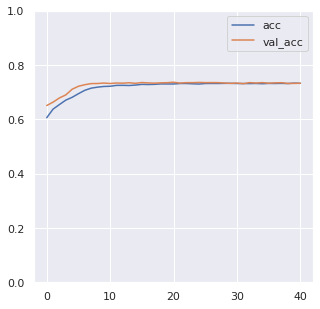

In [145]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.ylim((0, 1))
plt.legend()

In [147]:
# Predicting the Train set results
from sklearn import metrics
nn_prediction = model.predict(x_train)
nn_prediction = (nn_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_ann2 = round(metrics.accuracy_score(y_train, nn_prediction) * 100, 2)
acc_ann2

73.6

In [148]:
# Predicting the Test set results
nn_prediction_test = model.predict(x_test)
nn_prediction_test = (nn_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_test_ann2 = round(metrics.accuracy_score(y_test, nn_prediction_test) * 100, 2)
acc_test_ann2

73.23

# Models evaluation 

In [149]:
## We can now rank our evaluation of all the models to choose the best one for our problem.

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'k-Nearest Neighbors', 
              'Decision Tree Classifier', 'Random Forest','Neural Network 2' ],
  'Score_train': [acc_log, 
                  acc_svc,
                  acc_knn,
                  acc_decision_tree, 
                  acc_random_forest,
                  acc_ann2],'Score_test': [acc_test_log, 
                                           acc_test_svc, 
                                           acc_test_knn, 
                                           acc_test_decision_tree, 
                                           acc_test_random_forest, 
                                           acc_test_ann2]})

In [150]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,Random Forest,99.97,71.52
3,Decision Tree Classifier,99.97,63.47
2,k-Nearest Neighbors,80.74,63.72
5,Neural Network 2,73.60,73.23
1,Support Vector Machines,73.27,72.57
0,Logistic Regression,71.99,71.64


In [151]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
5,Neural Network 2,73.60,73.23
1,Support Vector Machines,73.27,72.57
0,Logistic Regression,71.99,71.64
4,Random Forest,99.97,71.52
2,k-Nearest Neighbors,80.74,63.72
3,Decision Tree Classifier,99.97,63.47


In [152]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
0,Logistic Regression,71.99,71.64,0.35
5,Neural Network 2,73.60,73.23,0.37
1,Support Vector Machines,73.27,72.57,0.70
2,k-Nearest Neighbors,80.74,63.72,17.02
4,Random Forest,99.97,71.52,28.45
3,Decision Tree Classifier,99.97,63.47,36.50


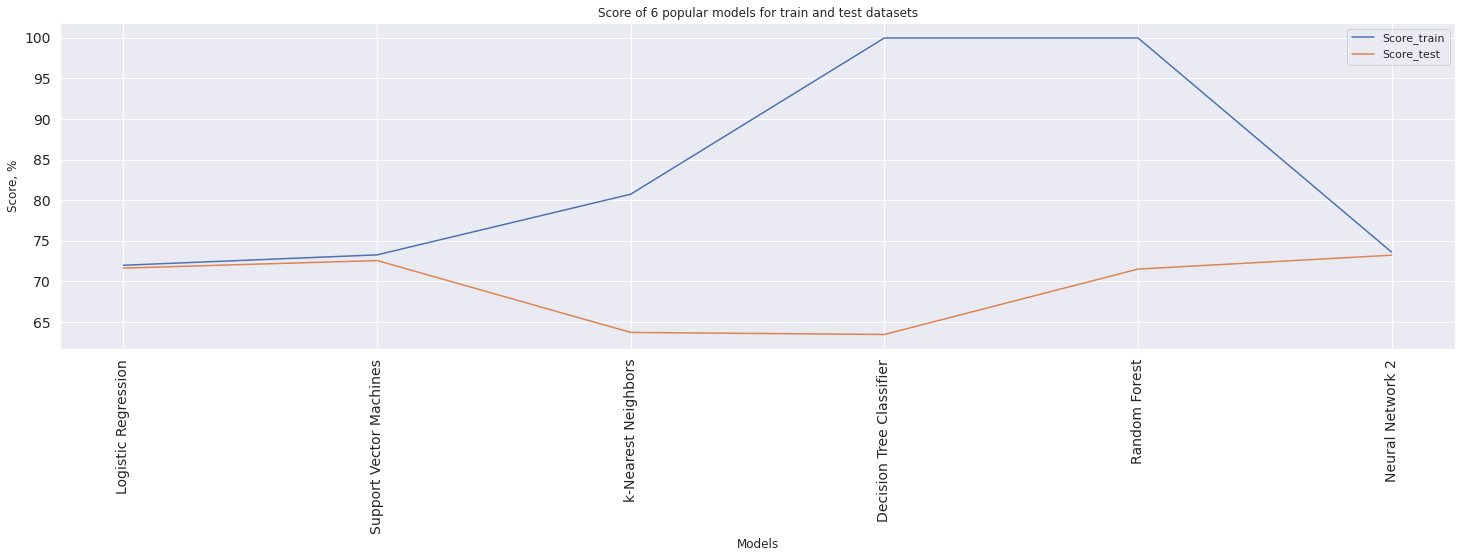

In [154]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 6 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()